# End effector Control with critical damping

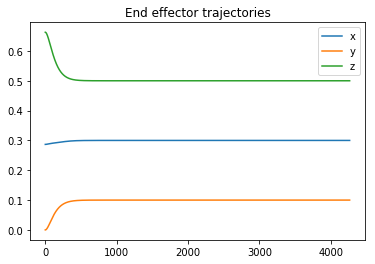

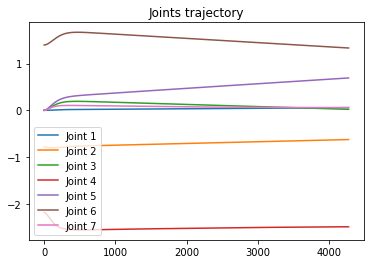

In [24]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller2.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

Firstly, we have to tune kv to reach critical damping. As we compensate for the mass, the system is decoupled. We can apply the following formula: $$kv = 2*\xi * \sqrt(kp) = 28$$.

We observe that the end effector reaches the desired position which in a point in 3D space. However, the Panda has 7 DOF which means that it has many ways to reach this end-effector position. We can see that the Panda continues to move even if we reach the desired position. It can be explained by the nullspace of the Jacobian which is not empty. 

# End effector Control with joints damping

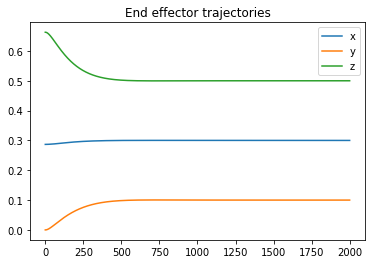

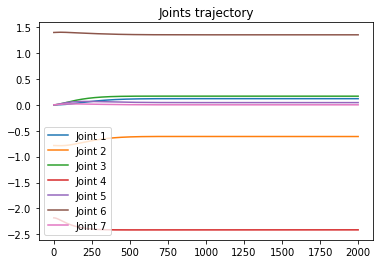

In [25]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller2.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

I chose $$Kv_j = 10 *Id$$ because it was the value which distrub the end-effector position trajectories the less. We can see the Joint 7 stops moving with the damping. However, due to this damping, it takes more time for the system to reach the desired position. It would be better to only add damping to joint moving in the nullspace.

# End effector Control with damping in the nullspace

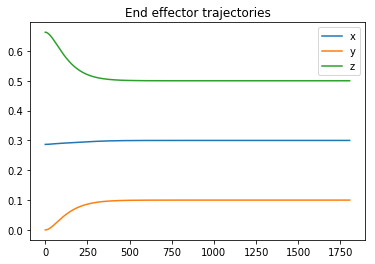

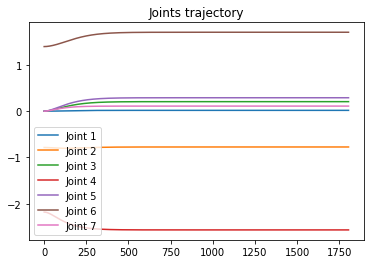

In [26]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller2.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

We add damoing in the nullspace of the control space. This leads to a system response as fast as 2(a) but without joints movements in the nullspace. Only the nullspace is damped, it does not disturb the task control. 